In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Assuming your data is in a CSV file, load it
# Replace 'your_data.csv' with the actual file path
# Load the dataset
data = pd.read_excel("C:/Users/sachi/Downloads/Johns_Hopkins/ONCO_datasets/LL CDC data sets/Leukemia/ALL23.xlsx")

In [3]:
# Select relevant columns
features = ['Sex', 'Year', 'AgeGroup', 'Ethnicity', 'Race']
target = 'Crude Rate'

In [4]:

# Normalize the features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()


data[features] = scaler_features.fit_transform(data[features])
joblib.dump(scaler_features, 'scalerX.joblib')
data[[target]] = scaler_target.fit_transform(data[[target]])
joblib.dump(scaler_target, 'scalerY.joblib')

['scalerY.joblib']

In [5]:
# Access the 'Survival Rate' column
survival_rate_column = data['Survival Rate'].values

# Reshape the data to fit the scaler's requirements (if it's a single feature)
survival_rate_column = survival_rate_column.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler_survivalrate = MinMaxScaler()

# Fit and transform the data
ss_rate_scaled = scaler_survivalrate.fit_transform(survival_rate_column)
joblib.dump(scaler_survivalrate, 'scalerT.joblib')


['scalerT.joblib']

In [6]:
ss_rate_scaled

array([[0.97747778],
       [0.99042635],
       [0.99990383],
       [0.99382139],
       [0.96001813],
       [0.9728246 ],
       [0.90250503],
       [0.87842463],
       [0.86625988],
       [0.82184411],
       [0.80185303],
       [0.63786132],
       [0.72546171],
       [0.97850955],
       [0.96972147],
       [0.98158942],
       [0.98160179],
       [0.96192054],
       [0.94926668],
       [0.92164462],
       [0.89184859],
       [0.86437366],
       [0.81177485],
       [0.71112652],
       [0.69158435],
       [0.56110614],
       [0.96786363],
       [0.96936203],
       [0.97711468],
       [0.9932315 ],
       [0.97830649],
       [0.98049214],
       [0.94274307],
       [0.94348836],
       [0.87777462],
       [0.86978378],
       [0.76866439],
       [0.77290515],
       [0.70896847],
       [0.57472266],
       [0.94771613],
       [0.78665046],
       [0.97401019],
       [0.97312172],
       [0.94953351],
       [0.9598227 ],
       [0.9973041 ],
       [0.964

In [7]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)


In [8]:
# Prepare the data for LSTM
def create_dataset(data, features, target, seq_length=1):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[features].iloc[i:i+seq_length].values)
        y.append(data[target].iloc[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 20
X_train, y_train = create_dataset(train_data, features, target, seq_length)
X_test, y_test = create_dataset(test_data, features, target, seq_length)

In [9]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\sachi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Save the model
joblib.dump(model, 'crmodel.joblib')

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0266 - val_loss: 0.0336
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0208 - val_loss: 0.0297
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0232 - val_loss: 0.0281
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0188 - val_loss: 0.0263
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0203 - val_loss: 0.0242
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0155 - val_loss: 0.0272
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0184 - val_loss: 0.0233
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0162 - val_loss: 0.0233
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0156 - val_loss: 0.0221
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0161 - val_loss: 0.0221
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0158 - val_loss: 0.0206
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

In [11]:
# Inverse transform the predictions and actual values
train_predict = scaler_target.inverse_transform(train_predict)
test_predict = scaler_target.inverse_transform(test_predict)
y_train = scaler_target.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler_target.inverse_transform(y_test.reshape(-1, 1))



In [12]:
y_test[10:20]

array([[2.1],
       [0.3],
       [1.1],
       [0.5],
       [1. ],
       [0.4],
       [0.4],
       [0.9],
       [0.3],
       [0.3]])

In [13]:
test_predict[10:20]

array([[1.9476452 ],
       [2.4492846 ],
       [0.9908127 ],
       [0.25305387],
       [0.38150156],
       [0.55375075],
       [0.6295531 ],
       [0.62116486],
       [0.5765275 ],
       [0.52730125]], dtype=float32)

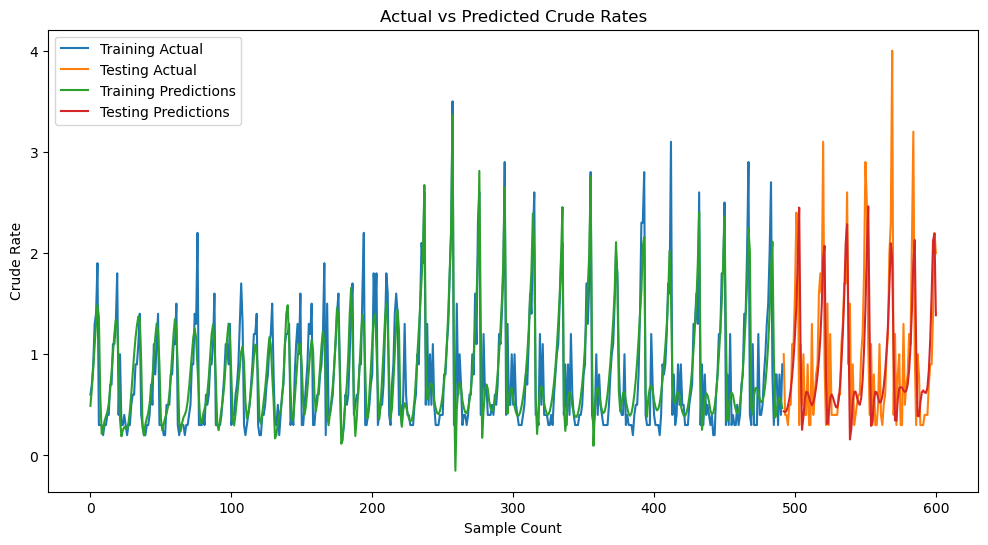

In [17]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train)), y_train, label='Training Actual')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Testing Actual')
plt.plot(range(len(y_train)), train_predict, label='Training Predictions')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), test_predict, label='Testing Predictions')


plt.xlabel('Sample Count')
plt.ylabel('Crude Rate')
plt.legend()
plt.title('Actual vs Predicted Crude Rates')
plt.show()

In [15]:
# Function to predict future crude rate based on user input
def predict_future_crude_rate(model, user_input, scaler_features, scaler_target, seq_length=3):
    # Normalize user input
    user_input = scaler_features.transform([user_input])
    user_input = np.array([user_input for _ in range(seq_length)]).reshape(1, seq_length, -1)
    
    # Make prediction
    prediction = model.predict(user_input)
    prediction = scaler_target.inverse_transform(prediction)
    
    return prediction[0][0]

In [16]:

# Example usage: Predict future crude rate for a given user input
user_input = [1, 2008, 1, 0, 1]  # Replace with actual input
predicted_crude_rate = predict_future_crude_rate(model, user_input, scaler_features, scaler_target)
print(f"Predicted Crude Rate: {predicted_crude_rate}")

C:\Users\sachi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Predicted Crude Rate: 0.4659234285354614
